In [6]:
from skimage.io import imread, imsave
from skimage.exposure import histogram,equalize_adapthist,equalize_hist
from skimage.filters import threshold_otsu,threshold_yen
import matplotlib.pyplot as plt
import numpy as np
from pre_proceso import process

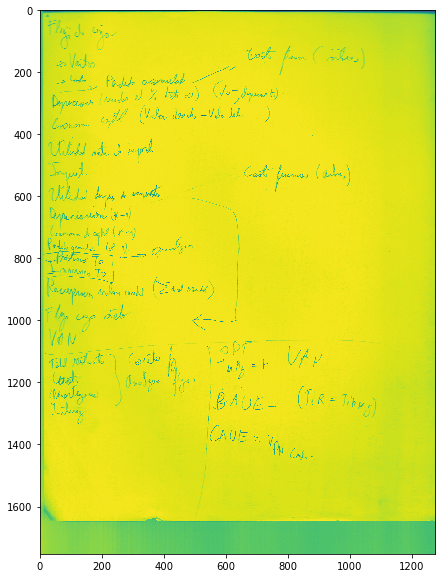

In [8]:
# Leer imagen de apuntes
ruta = "imagenes/evaluacionP/evalproj-04.png"

im = imread(ruta,as_grey=True)
plt.figure(figsize=(10,10))
plt.imshow(im)
plt.show()

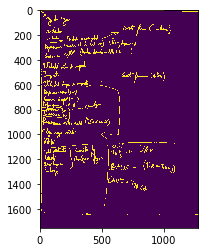

In [162]:
t1 = process(im)
plt.imshow(t1)
plt.show()

In [174]:
from skimage.draw import polygon_perimeter

def rectangle(r0, c0, rf, cf):
    rr, cc = [r0, rf, rf, r0], [c0, c0, cf, cf]

    return polygon_perimeter(rr, cc)

def draw_boxes(labels,n_labels,fis = (20,20)):
    assert(len(labels.shape) == 2)
    
    out = np.zeros((labels.shape[0],labels.shape[1],3))
    out[:,:,0] = labels
    
    for i in range(n_labels):
        cords = np.where(labels == i)
        if len(cords[0]) == 0:
            continue
        start = (cords[0].min(),cords[1].min()) 
        end = (cords[0].max(),cords[1].max())
#         print(cords)
#         print("rectangle {0} {1}".format(start,end))
        p0 = (start[0],start[1])
        p1 = (start[0], end[1])
        
        rr, cc = line(min(p0[0],p1[0]), min(p0[1],p1[1]), max(p0[0],p1[0]), max(p0[1],p1[1]))
        out[rr,cc,1] = 1
        
        p0 = (start[0],end[1])
        p1 = (end[0], end[1])
        
        rr, cc = line(min(p0[0],p1[0]), min(p0[1],p1[1]), max(p0[0],p1[0]), max(p0[1],p1[1]))
        out[rr,cc,1] = 1
        
        p0 = (end[0],end[1])
        p1 = (end[0], start[1])
        
        rr, cc = line(min(p0[0],p1[0]), min(p0[1],p1[1]), max(p0[0],p1[0]), max(p0[1],p1[1]))
        out[rr,cc,1] = 1
        
        p0 = (start[0],start[1])
        p1 = (end[0], start[1])
        
        rr, cc = line(min(p0[0],p1[0]), min(p0[1],p1[1]), max(p0[0],p1[0]), max(p0[1],p1[1]))
        out[rr,cc,1] = 1

#         rr, cc = rectangle(start[0], end[0], start[1], end[1])
#         out[rr,cc,1] = 1
        
#         plt.imshow(labels[start[0]:end[0],start[1]:end[1]])
#         plt.show()
#         break
        

    plt.figure(figsize=fis)
    plt.imshow(out)
    plt.show()


In [175]:
labels2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

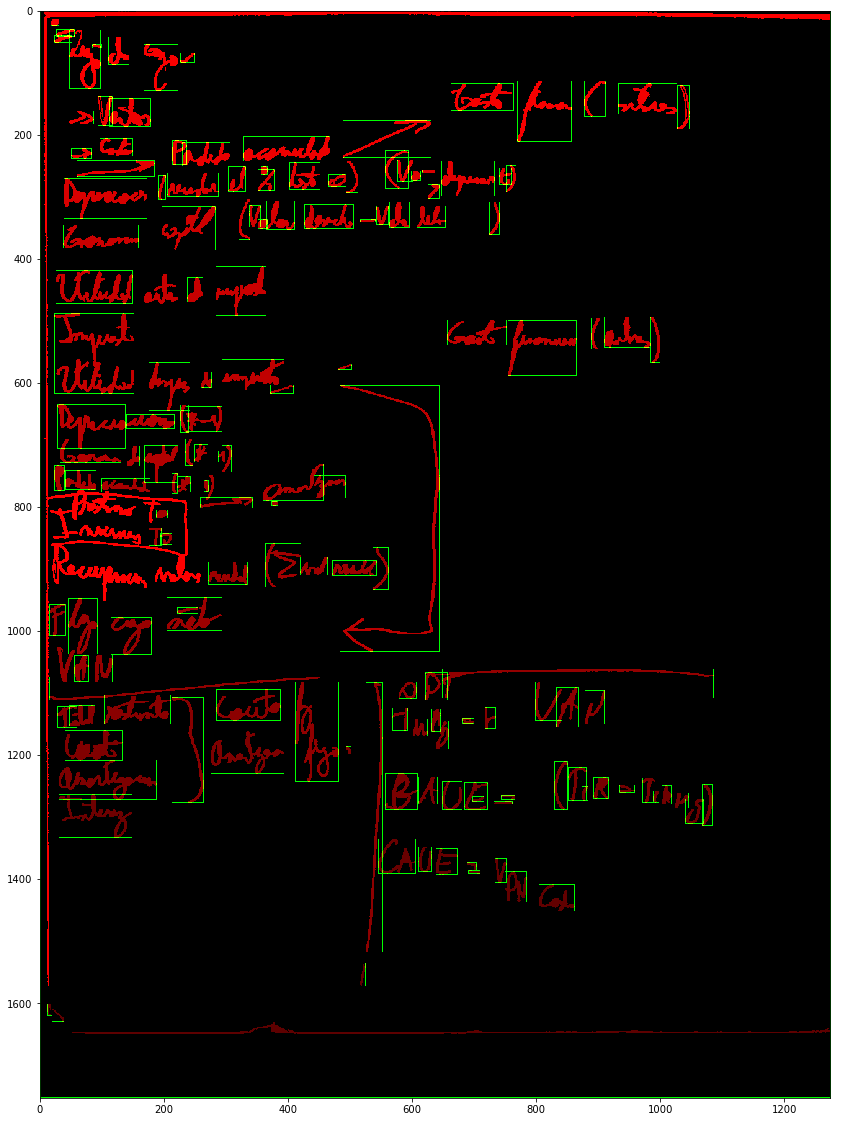

In [199]:
draw_boxes(trazos,numero_trazos,fis=(20,20))

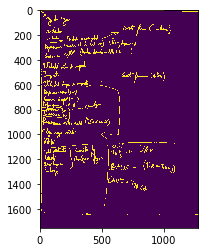

In [206]:
plt.imshow(t1);plt.show()

Felzenszwalb number of segments: 782
SLIC number of segments: 102


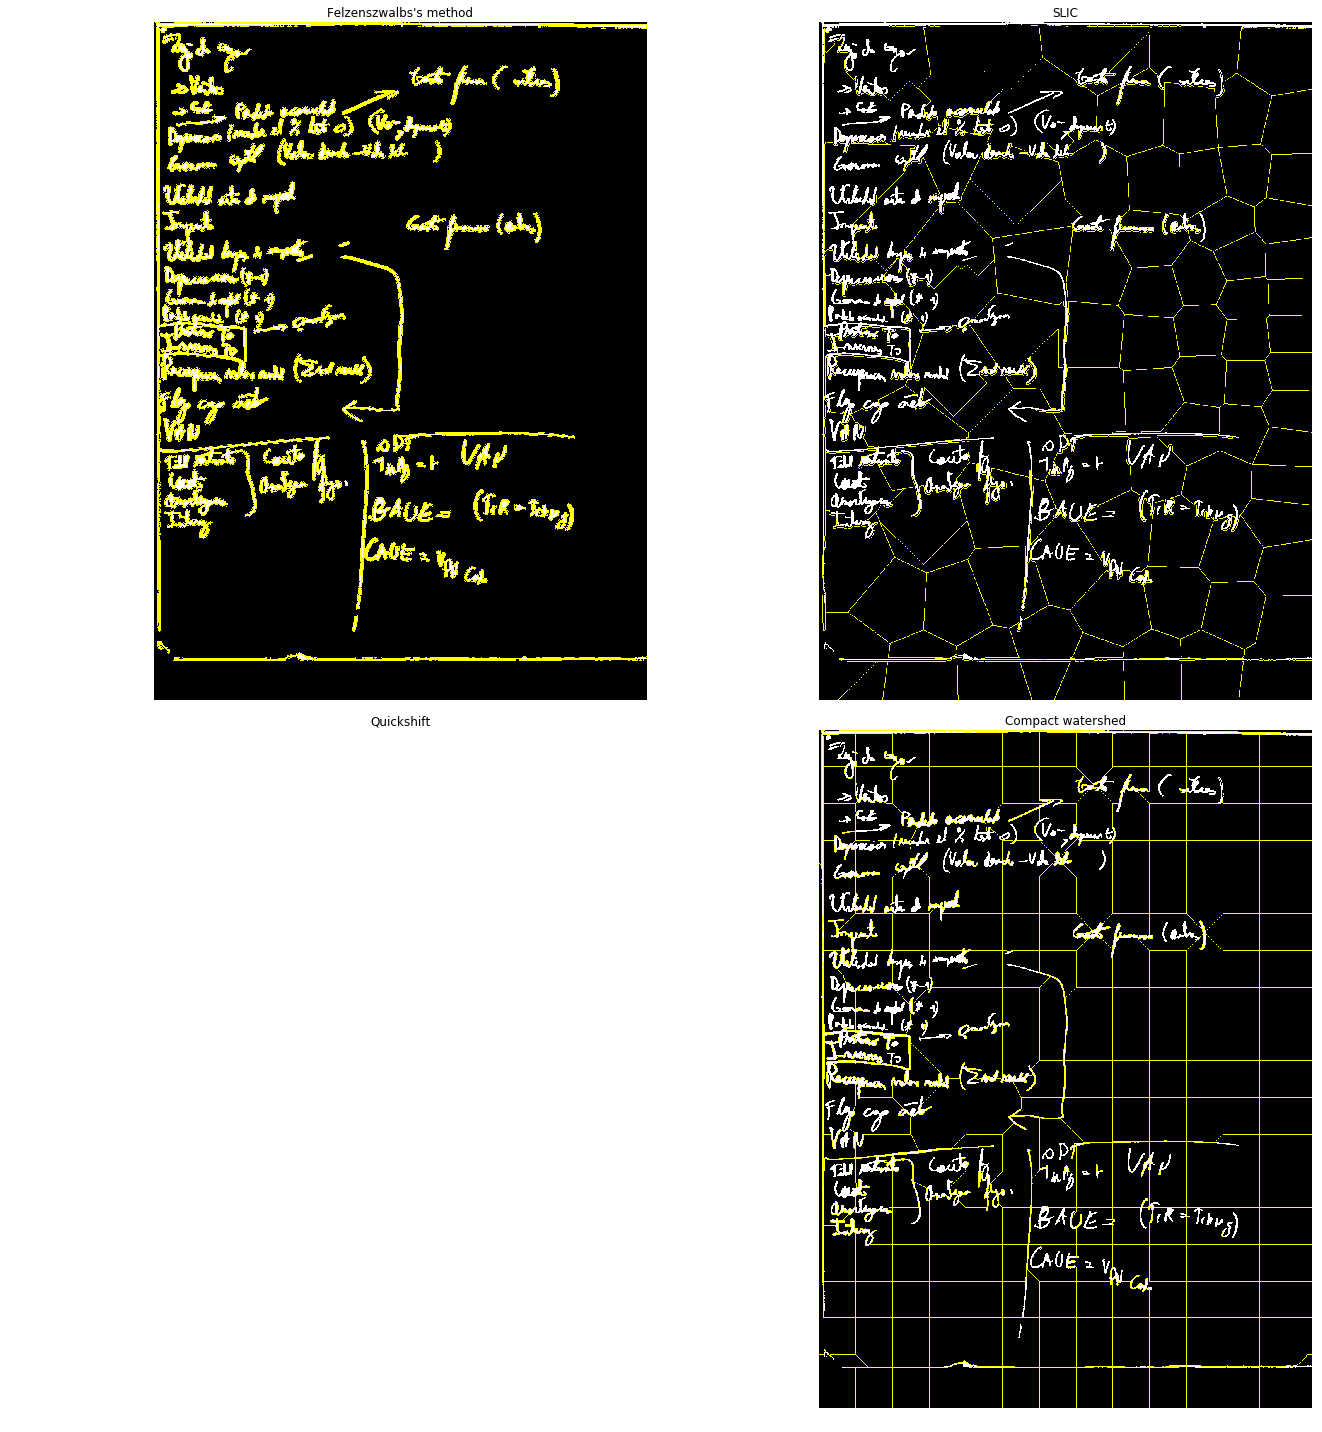

In [204]:


trazos,numero_trazos = ndi.label(t1)


from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np

from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

img = t1

segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
segments_slic = slic(img, n_segments=250, compactness=0.0001, sigma=1)
#segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers=250, compactness=0.00001)

print("Felzenszwalb number of segments: {}".format(len(np.unique(segments_fz))))
print('SLIC number of segments: {}'.format(len(np.unique(segments_slic))))
#print('Quickshift number of segments: {}'.format(len(np.unique(segments_quick))))

fig, ax = plt.subplots(2, 2, figsize=(20, 20), sharex=True, sharey=True,
                       subplot_kw={'adjustable': 'box-forced'})

ax[0, 0].imshow(mark_boundaries(img, segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(img, segments_slic))
ax[0, 1].set_title('SLIC')
#ax[1, 0].imshow(mark_boundaries(img, segments_quick))
ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
ax[1, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

In [201]:
segments_fz.max()

781

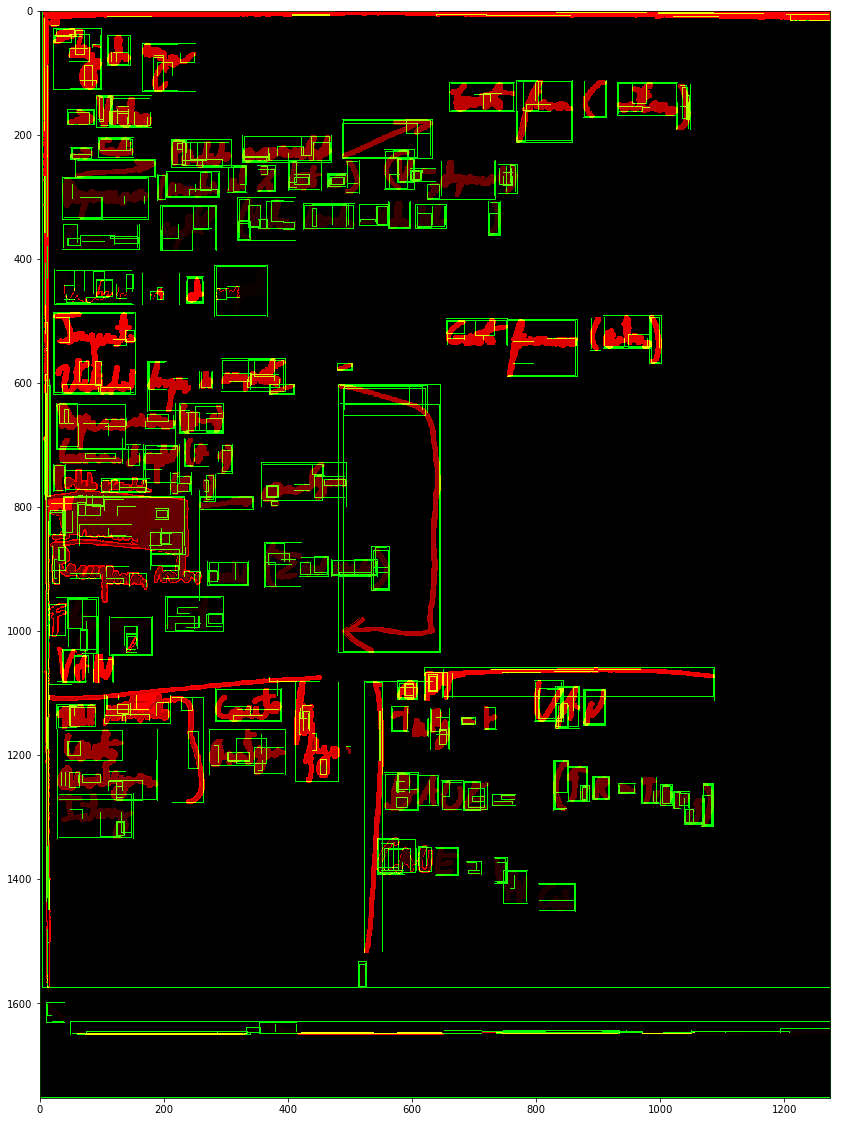

In [202]:

draw_boxes(segments_fz,segments_fz.max(),fis=(20,20));


In [173]:
labels.min()

1